In [ ]:
!pip install --upgrade rulefit interpret skope-rules
!sudo pip install xgboost
!pip install scikit-plot
!pip install eli5
!pip install shap
!pip install pdpbox

     |████████████████████████████████| 6.6 MB 5.0 MB/s 
     |████████████████████████████████| 275 kB 82.2 MB/s 
     |████████████████████████████████| 131 kB 66.4 MB/s 
     |████████████████████████████████| 793 kB 52.9 MB/s 
     |████████████████████████████████| 9.6 MB 48.4 MB/s 
     |████████████████████████████████| 5.8 MB 46.3 MB/s 
     |████████████████████████████████| 3.6 MB 56.0 MB/s 
     |████████████████████████████████| 756 kB 55.4 MB/s 
     |████████████████████████████████| 564 kB 59.9 MB/s 
     |████████████████████████████████| 280 kB 50.2 MB/s 
     |████████████████████████████████| 251 kB 60.3 MB/s 
     |████████████████████████████████| 428 kB 79.3 MB/s 
     |████████████████████████████████| 130 kB 78.0 MB/s 
     |████████████████████████████████| 381 kB 72.9 MB/s 
     |████████████████████████████████| 81 kB 14.0 MB/s 
     |████████████████████████████████| 357 kB 84.4 MB/s 
     |████████████████████████████████| 65 kB 4.0 MB/s 
  Created wheel fo

     |████████████████████████████████| 106 kB 4.3 MB/s 
     |████████████████████████████████| 34.0 MB 1.3 MB/s 
     |████████████████████████████████| 13.1 MB 47.6 MB/s 
  Created wheel for pdpbox: filename=PDPbox-0.2.1-py3-none-any.whl size=35758224 sha256=4bbe88d8c7abf9ed6b02ced18e48b07f06c01969a404958ee9205985321dfa1a
  Stored in directory: /root/.cache/pip/wheels/f4/d0/1a/b80035625c53131f52906a6fc4dd690d8efd2bf8af6a4015eb
Successfully built pdpbox
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.2.2
    Uninstalling matplotlib-3.2.2:
      Successfully uninstalled matplotlib-3.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


In [ ]:
# %cd /content/drive/My Drive/kaggle
# !cp kaggle.json ~/.kaggle/
# !chmod 600 ~/.kaggle/kaggle.json
%cd /content/drive/MyDrive/well done projects/02-Supervised Learning/17-Mobile Price Classification
# !kaggle datasets download iabhishekofficial/mobile-price-classification
# !mkdir data
# !unzip mobile-price-classification.zip 

/content/drive/MyDrive/well done projects/02-Supervised Learning/17-Mobile Price Classification


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use('fivethirtyeight')
import plotly.graph_objs as go
from plotly.offline import iplot
import warnings
warnings.filterwarnings('ignore')

from sklearn import linear_model, tree, neighbors, ensemble, neural_network, svm, naive_bayes, preprocessing, metrics
import xgboost
from sklearn.pipeline import make_pipeline
from scipy import stats
import scikitplot as skplt
import eli5
from eli5.sklearn import PermutationImportance
import shap
from pdpbox import pdp, info_plots

In [ ]:
df = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
test.drop(['id'], axis=1, inplace=True)
print(f'Train shape {df.shape} \n Test shape {test.shape}')
pd.set_option('display.max_columns', None)
df.head()

Train shape (2000, 21) 
 Test shape (1000, 20)


,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0,1


# Data exploration

Let us analyze the data

In [ ]:
# find missing values
print(f'There are {sum(df.isnull().sum())} null values in the train dataset')
print(f'There are {sum(test.isnull().sum())} null values in the test dataset')

There are 0 null values in the train dataset
There are 0 null values in the test dataset


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

# Data Visualization

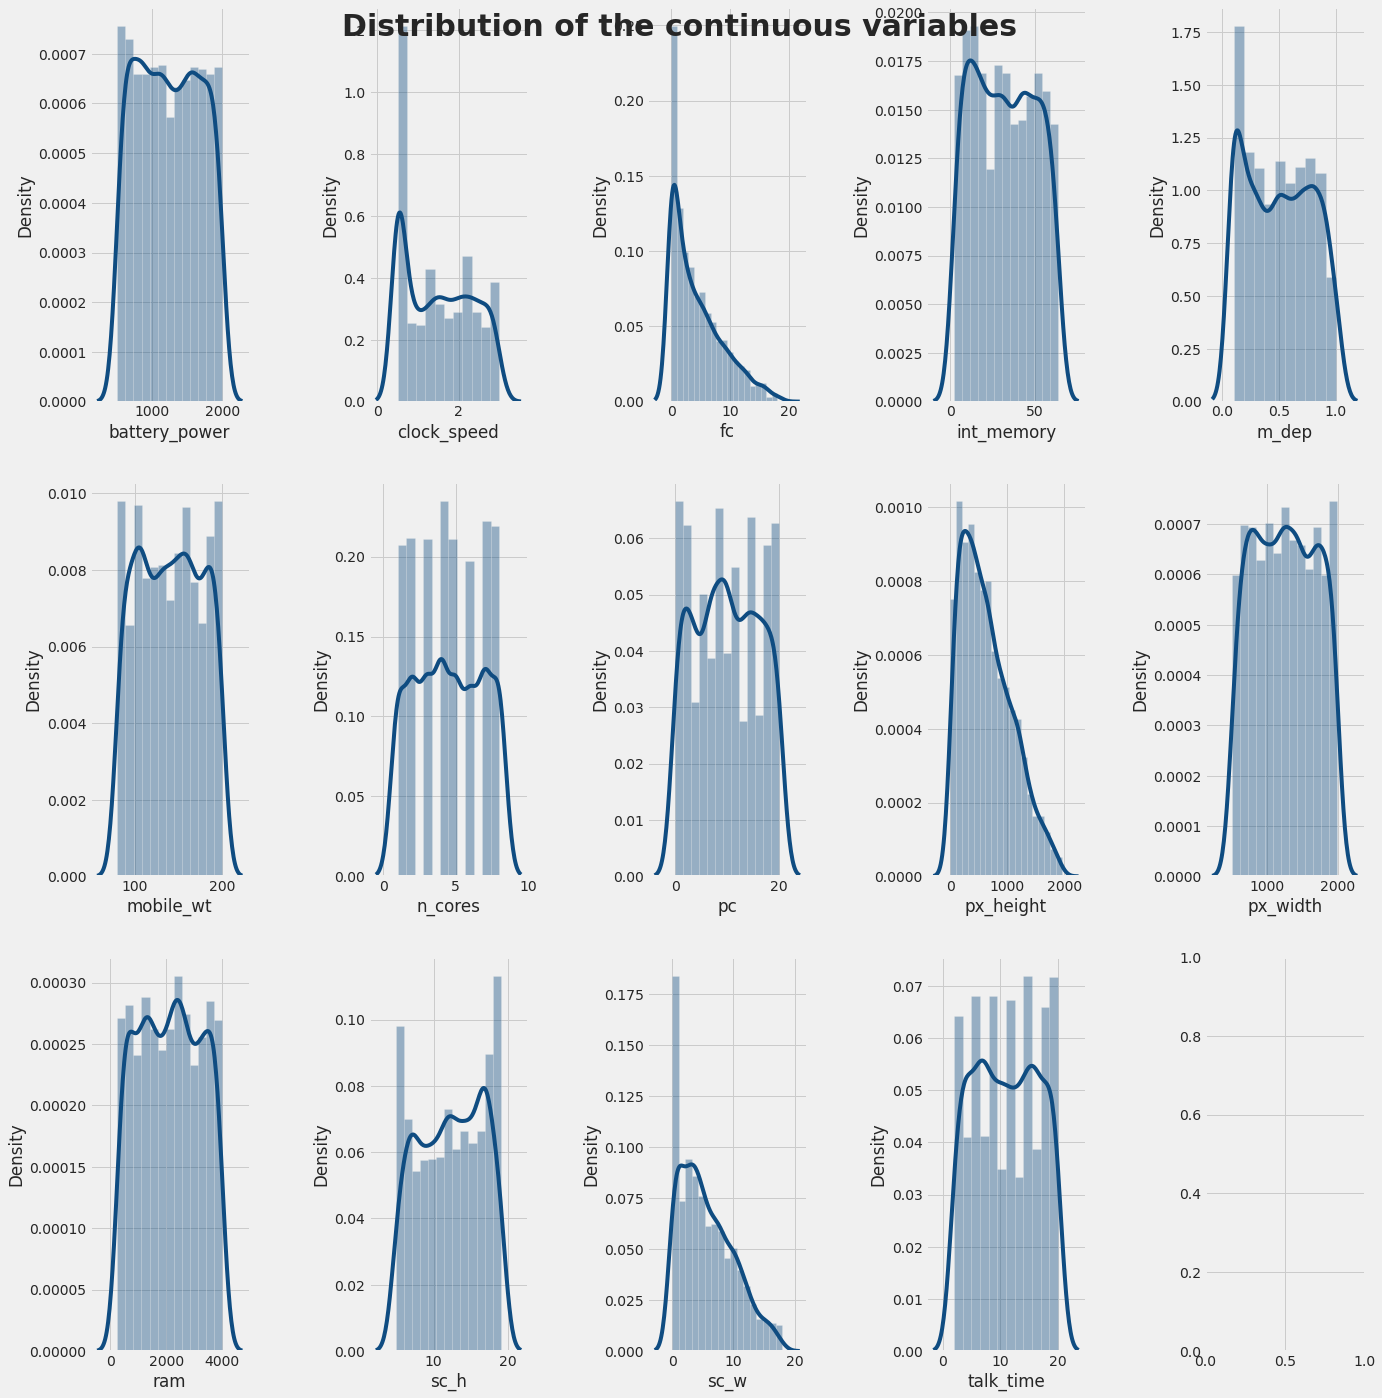

In [ ]:
variables = df.columns.drop('price_range')
discrete = ['blue','dual_sim','four_g','three_g','touch_screen','wifi']
continuous = variables.drop(discrete)

# Plot the distribution of the numeric variables
fig, axs = plt.subplots(3,5, figsize=(15,15))
background_color = '#fafafa'
# axs = axs.squeeze()
for var, ax in zip(continuous, axs.ravel()):
  sns.distplot(df[var], ax= ax, color='#0f4c81')
  ax.set_xlabel(var)
plt.suptitle('Distribution of the continuous variables', fontsize=30,fontweight='bold')  
plt.tight_layout()
plt.gcf().set_size_inches(20,20)

## Analysis of the number of cores

In [ ]:

labels = df['n_cores'].unique().tolist()
amount = df['n_cores'].value_counts().tolist()
colors = ["#ff9999", "#b3d9ff", " #e6ffb3"]

trace = go.Pie(labels=labels, values=amount,
               hoverinfo='label+percent', textinfo='value', 
              #  textfont=dict(size=20),
               marker=dict(colors=colors, 
                           line=dict(color='#000000', width=2)))

data = [trace]
layout = go.Layout(title="Number of cores")

fig = go.Figure(data=data, layout=layout)
iplot(fig, filename='basic_pie_chart')

## Does Ram affect the battery power

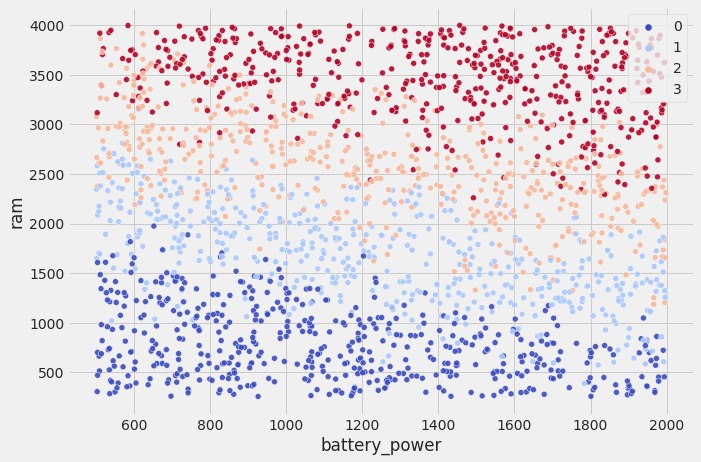

In [ ]:
plt.figure(figsize=(12,12))
sns.scatterplot(x='battery_power', y='ram', data=df,hue='price_range',
                palette='coolwarm', alpha=0.9)
plt.legend(loc='upper right')
plt.gcf().set_size_inches(10,7)

In [ ]:
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0,1


As we can see, as ram and battery power increase, there is an increase in the price of the phone

Text(0.5, 1.0, 'Diagonal Correlation Matrix')

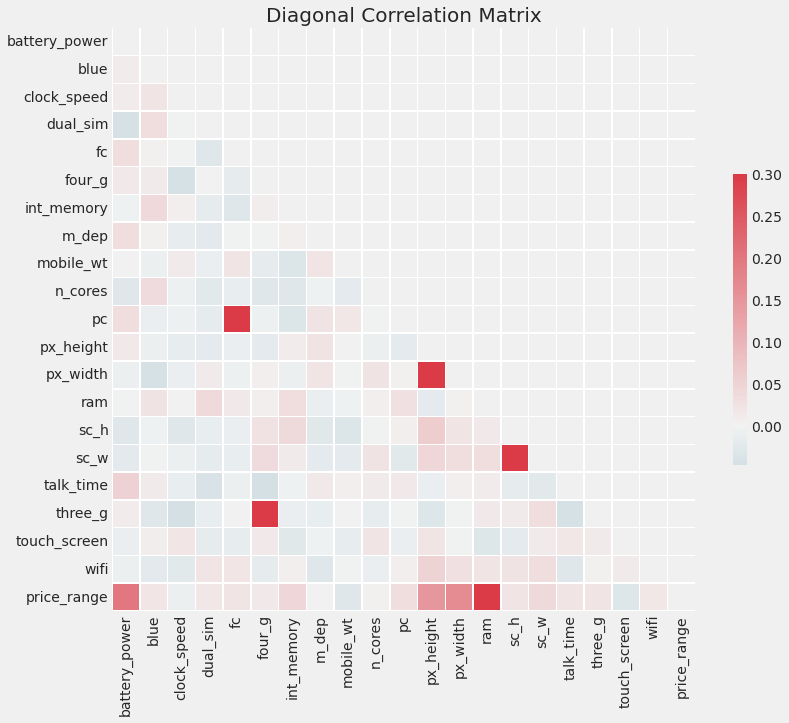

In [ ]:
corr = df.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

fig, axs = plt.subplots(figsize=(12,10))
cmap = sns.diverging_palette(220,10, as_cmap=True)

sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0, square=True, linewidth=.5, 
            cbar_kws={'shrink':.5})
plt.title('Diagonal Correlation Matrix', fontsize=20)

Some of the features that are highly correlated with the price range are:
* Battery power
* px_height
* px_width
* ram

There are some features that are highly correlated with one another. Therefore, will drop some of them:
* A phone that has 4G will also have 3G, therefore, we ill drop the 3G column
* Front camera pixels and primary camera pixels are highly correlated thefore we will drop one of them
* We will also drop one of px_height and px_width 
* Drop one of sc_h and sc_w

# Model Building

In [ ]:
df.drop(columns=['three_g', 'fc', 'px_height','sc_w'], axis=1, inplace=True)
test.drop(columns=['three_g', 'fc', 'px_height','sc_w'], axis=1, inplace=True)

from sklearn.model_selection import train_test_split, GridSearchCV
X,y=df.values[:,:-1],df.values[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12)

In [ ]:
class_models = {
    # Generalized linear models
    'logistic': {'model': linear_model.LogisticRegression(C= 10.0, class_weight= 'balanced', penalty= 'l1', 
                                                          random_state= 42, solver= 'liblinear')},
    'ridge': {'model': linear_model.RidgeClassifierCV(cv=5, alphas=[1e-3, 1e-2, 1e-1, 1], class_weight='balanced')},

    # Tree
    'decision_tree': {'model': tree.DecisionTreeClassifier(class_weight= None, criterion= 'gini',
                                                           max_depth= 5, max_features= 11, random_state= 42)},

    # Nearest Neighbors
    'knn': {'model': neighbors.KNeighborsClassifier(metric= 'manhattan', n_neighbors= 9, weights= 'uniform')},

    # svc
    'svc': {'model': svm.SVC(C=10, kernel='rbf',probability=True)},

    # Naive bayes
    'gaussian_naive_bayes': {'model': naive_bayes.GaussianNB()},
    'multinomial_naive_bayes': {'model': naive_bayes.MultinomialNB()},

    # ensemble 
    'gradient_boosting': {'model': ensemble.GradientBoostingClassifier(learning_rate= 0.1, max_depth= 1, 
                                                                       n_estimators= 500)},
    'random_forest': {'model': ensemble.RandomForestClassifier(bootstrap= False, class_weight= 'balanced',
                                                               max_depth= 20, max_features= 'auto',
                                                               n_estimators= 200, random_state= 42)},

    # xgb
    'xgb': {'model': xgboost.XGBClassifier()},

    # Neural Networks
    'mlp': {'model': make_pipeline(preprocessing.StandardScaler(), neural_network.MLPClassifier(hidden_layer_sizes=(7,1),
                                                                                                max_iter=500, early_stopping=True,
                                                                                                random_state=42))}

}

In [ ]:
for model_name in class_models.keys():
  fitted_model = class_models[model_name]['model'].fit(X_train, y_train)
  y_train_pred = fitted_model.predict(X_train)
  y_test_pred = fitted_model.predict(X_test)
  class_models[model_name]['fitted'] = fitted_model
  class_models[model_name]['preds'] = y_test_pred
  # Accuracy
  class_models[model_name]['Accuracy_train'] = metrics.accuracy_score(y_train, y_train_pred)
  class_models[model_name]['Accuracy_test'] = metrics.accuracy_score(y_test, y_test_pred)
  # Recall
  class_models[model_name]['Recall_train'] = metrics.recall_score(y_train, y_train_pred, average='micro')
  class_models[model_name]['Recall_test'] = metrics.recall_score(y_test, y_test_pred, average='micro')
  
  # F1_test
  class_models[model_name]['F1_test'] = metrics.f1_score(y_test, y_test_pred, average='micro')
  # mathews coefficient
  class_models[model_name]['MCC_test'] = metrics.matthews_corrcoef(y_test, y_test_pred)

In [ ]:
class_metrics = pd.DataFrame.from_dict(class_models, 'index')[['Accuracy_train','Accuracy_test','Recall_train','Recall_test',
                                                               'F1_test', 'MCC_test']]
class_metrics.sort_values(by='Accuracy_test', ascending=False).\
style.background_gradient(cmap='plasma', low=0.3, high=1, subset=['Accuracy_train', 'Accuracy_test']).\
background_gradient(cmap='viridis', low=1, high=0.3, subset=['Recall_train','Recall_test',
                                                             'F1_test', 'MCC_test'])

,Accuracy_train,Accuracy_test,Recall_train,Recall_test,F1_test,MCC_test
svc,0.898125,0.917500,0.898125,0.917500,0.917500,0.890340
knn,0.915000,0.897500,0.915000,0.897500,0.897500,0.863811
gradient_boosting,0.941250,0.895000,0.941250,0.895000,0.895000,0.860887
random_forest,1.000000,0.880000,1.000000,0.880000,0.880000,0.840695
xgb,0.956875,0.880000,0.956875,0.880000,0.880000,0.840361
logistic,0.838750,0.837500,0.838750,0.837500,0.837500,0.785442
decision_tree,0.874375,0.837500,0.874375,0.837500,0.837500,0.783303
gaussian_naive_bayes,0.798750,0.792500,0.798750,0.792500,0.792500,0.724958
ridge,0.596875,0.590000,0.596875,0.590000,0.590000,0.502798
multinomial_naive_bayes,0.546875,0.507500,0.546875,0.507500,0.507500,0.345240


We will go ahead with our SVC model.

Text(0.5, 1.0, 'Confusion matrix')

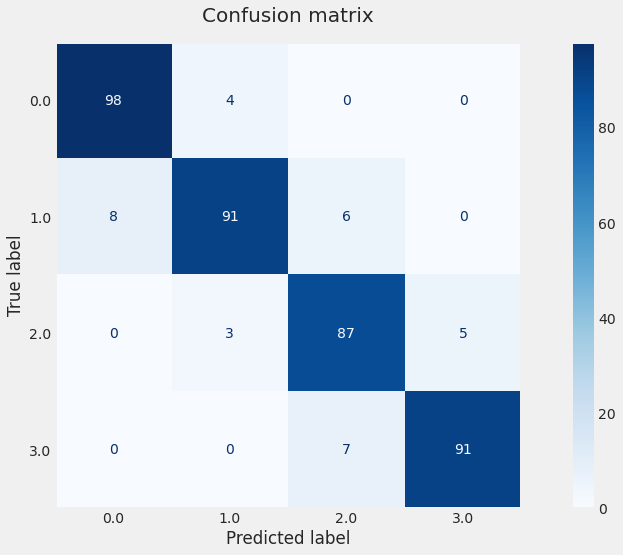

In [ ]:
model = class_models['svc']['fitted']
y_pred = model.predict(X_test)
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
fig, axs = plt.subplots(figsize=(16,8))
metrics.plot_confusion_matrix(model, X_test, y_test, cmap='Blues', ax = axs)
plt.grid(False)
plt.title('Confusion matrix', size=20, pad=20)


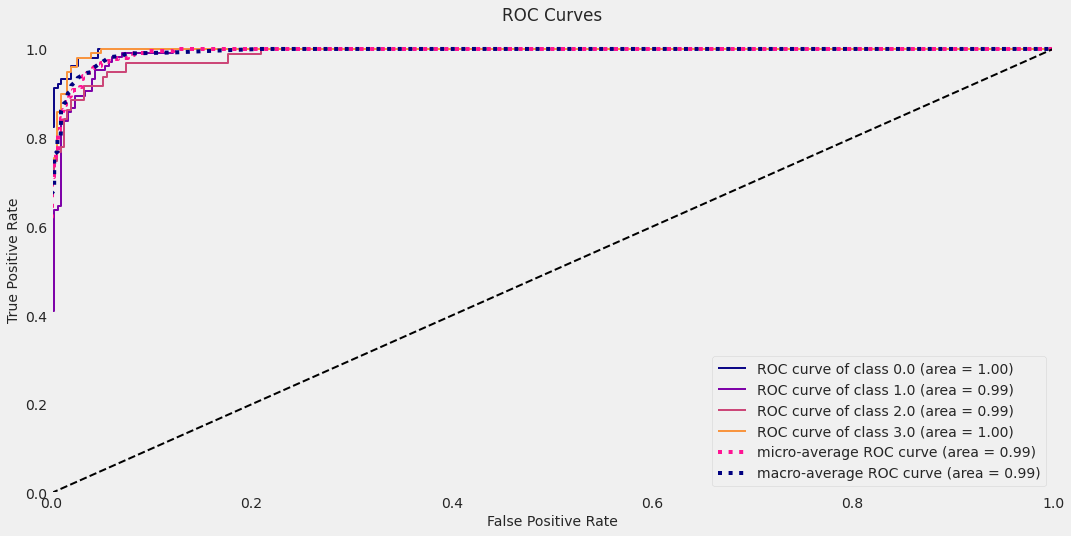

In [ ]:
# ROC curve
y_prob = model.predict_proba(X_test)
skplt.metrics.plot_roc(y_test, y_prob, figsize=(16,8), cmap='plasma')
plt.grid(False)


# Model Explainability


In [ ]:
perm = PermutationImportance(model, random_state=1).fit(X_test, y_test)
eli5.show_weights(perm, feature_names=test.columns.tolist())

Weight,Feature
0.6450 ± 0.0285,ram
0.1675 ± 0.0249,battery_power
0.1345 ± 0.0150,px_width
0.0065 ± 0.0051,mobile_wt
0.0010 ± 0.0024,int_memory
0 ± 0.0000,wifi
0 ± 0.0000,touch_screen
0 ± 0.0000,talk_time
0 ± 0.0000,sc_h
0 ± 0.0000,pc


As we can see, RAM is one of the main determinants in the price of a phone. Other factors involve battery power and px_width, mobile_wt and int_memory.

In [ ]:
features = ['ram', 'battery_power','px_width', 'mobile_wt', 'int_memory','price_range']
df1 = df[features]
X,y= df1[features].drop('price_range', axis=1), df1['price_range']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12)
model =  class_models['svc']['fitted']
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = metrics.accuracy_score(y_test, y_pred)
print(f'The test accuracy is {accuracy:.2%}')

The test accuracy is 91.75%


As we can see, removing some features improves the model's accuracy. Let us now analyze the features and see what effect they have on the outcome.

(<Figure size 1080x1080 with 5 Axes>,
 {'pdp_ax': [<matplotlib.axes._subplots.AxesSubplot at 0x7f713025d690>,
  'title_ax': <matplotlib.axes._subplots.AxesSubplot at 0x7f71304218d0>})

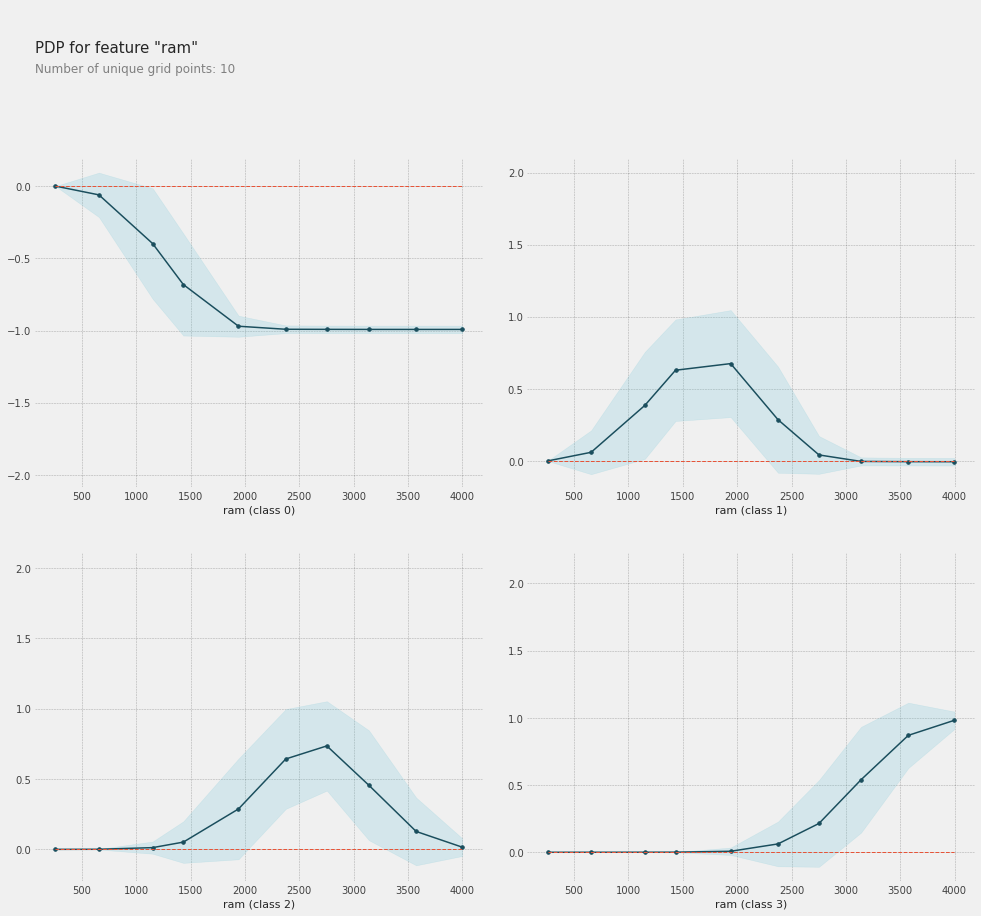

In [ ]:
base_features = df1[features].columns.tolist()
base_features.remove('price_range')
feature_name = 'ram'
pdp_hist = pdp.pdp_isolate(model=model, dataset=X_test, model_features=base_features,
                           feature = feature_name)
pdp.pdp_plot(pdp_hist, feature_name)

As we can see, all factors held constant, the probabiity of ram being class 0 decreases drastically for ram above 500. While the probability of a phone being class 3 increases after ram being above 2000.

(<Figure size 1080x1080 with 5 Axes>,
 {'pdp_ax': [<matplotlib.axes._subplots.AxesSubplot at 0x7f71271ea7d0>,
  'title_ax': <matplotlib.axes._subplots.AxesSubplot at 0x7f71271af610>})

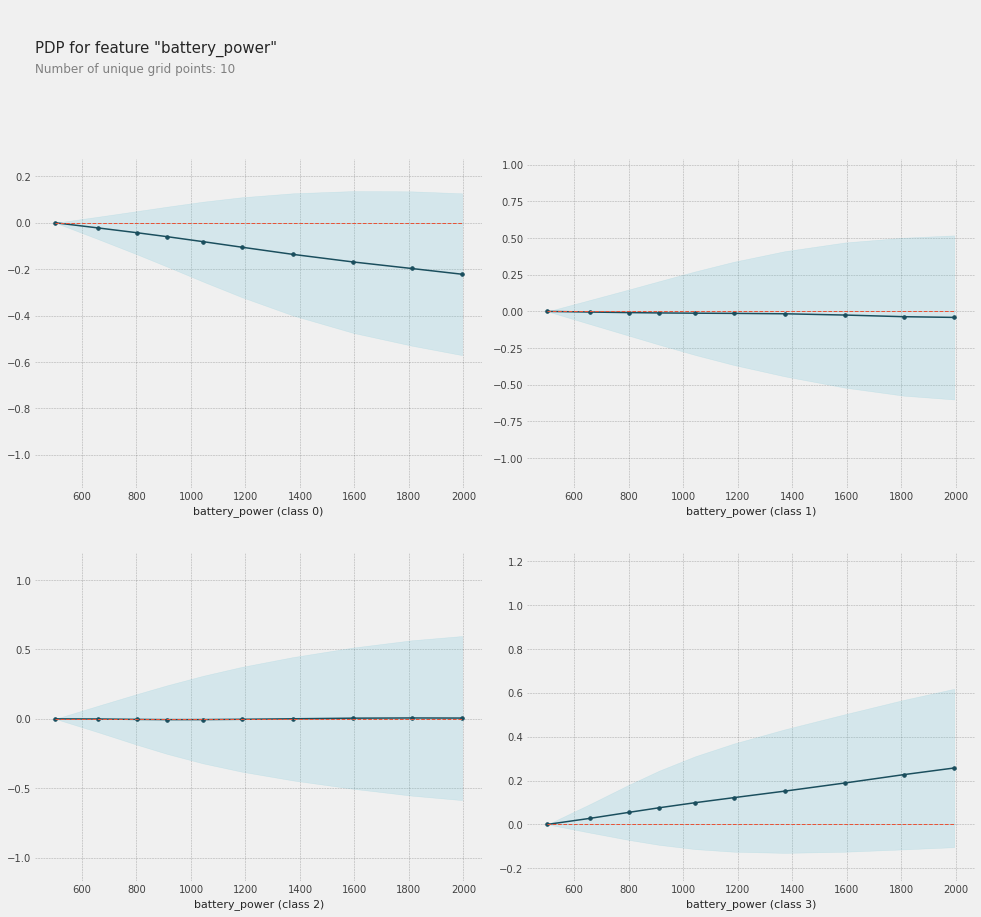

In [ ]:
base_features = df1[features].columns.tolist()
base_features.remove('price_range')
feature_name = 'battery_power'
pdp_hist = pdp.pdp_isolate(model=model, dataset=X_test, model_features=base_features,
                           feature = feature_name)
pdp.pdp_plot(pdp_hist, feature_name)

Let us look at the relationship between ram and battery power. 

(<Figure size 1080x1224 with 9 Axes>,
 {'pdp_inter_ax': [<matplotlib.axes._subplots.AxesSubplot at 0x7f7126f9c350>,
  'title_ax': <matplotlib.axes._subplots.AxesSubplot at 0x7f7126fbb810>})

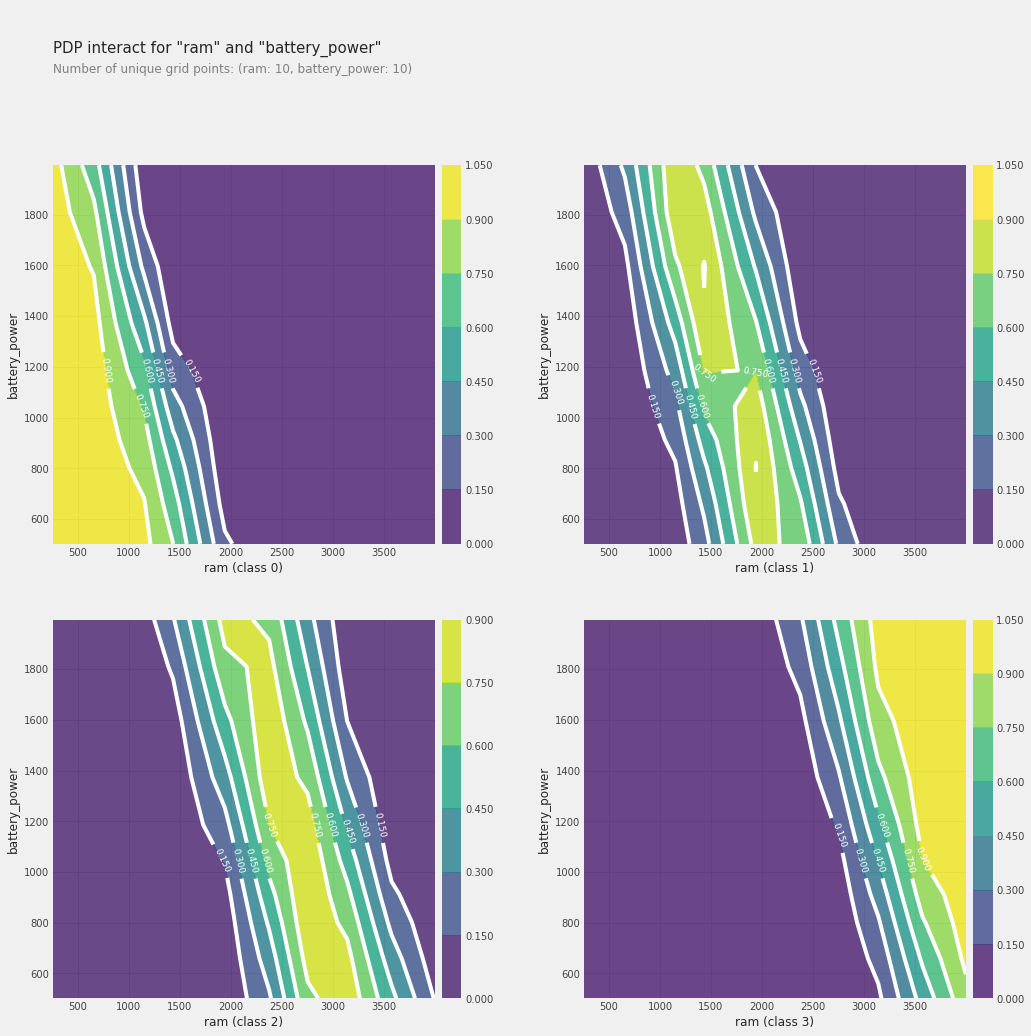

In [ ]:
features_to_plot=['ram', 'battery_power']
inter1 = pdp.pdp_interact(model=model, dataset=X_test, model_features=base_features,
                          features=features_to_plot)

pdp.pdp_interact_plot(pdp_interact_out=inter1, feature_names=features_to_plot, plot_type='contour')

* Probability of a phone being class 0drastically decreases as the battery power increases.
* Probability of a phone being class 3 increases as the battery power increases

Let us now analyze the relationship between 

(<Figure size 1080x1224 with 9 Axes>,
 {'pdp_inter_ax': [<matplotlib.axes._subplots.AxesSubplot at 0x7f7126b85b90>,
  'title_ax': <matplotlib.axes._subplots.AxesSubplot at 0x7f7126b97350>})

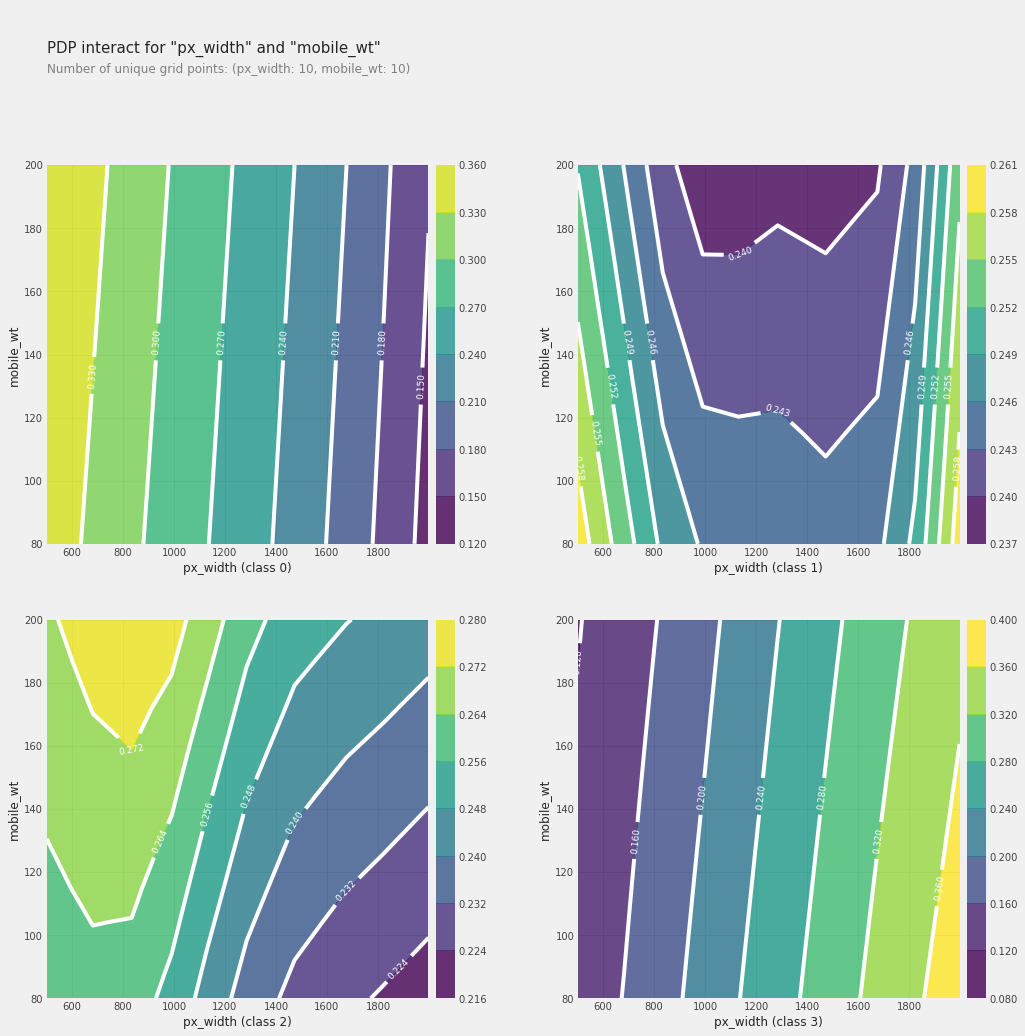

In [ ]:
features_to_plot=['px_width', 'mobile_wt']
inter1 = pdp.pdp_interact(model=model, dataset=X_test, model_features=base_features,
                          features=features_to_plot)

pdp.pdp_interact_plot(pdp_interact_out=inter1, feature_names=features_to_plot, plot_type='contour')

In [ ]:
test1 = test[['ram', 'battery_power','px_width', 'mobile_wt', 'int_memory']]
test_pred = model.predict(test1)
test['price_range'] = test_pred
test.head()

,battery_power,blue,clock_speed,dual_sim,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_width,ram,sc_h,talk_time,touch_screen,wifi,price_range
0,1043,1,1.8,1,0,5,0.1,193,3,16,1412,3476,12,2,1,0,3
1,841,1,0.5,1,1,61,0.8,191,5,12,857,3895,6,7,0,0,3
2,1807,1,2.8,0,0,27,0.9,186,3,4,1366,2396,17,10,1,1,2
3,1546,0,0.5,1,1,25,0.5,96,8,20,1752,3893,10,7,1,0,3
4,1434,0,1.4,0,1,49,0.5,108,6,18,810,1773,15,7,0,1,1
